In [11]:
import requests
import pandas as pd

url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)


In [13]:
import requests
import pandas as pd

url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
dados = response.json()

df = pd.DataFrame(dados)


In [15]:
print(df.dtypes)


customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object


In [17]:
for col in df.columns:
    mask = df[col].apply(lambda x: isinstance(x, dict))
    if mask.any():
        print(f"Coluna '{col}' tem dicionários nas linhas: {df[mask].index.tolist()}")


Coluna 'customer' tem dicionários nas linhas: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212

In [18]:
import json

colunas_com_dict = []

for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, dict)).any():
        colunas_com_dict.append(col)
        df[col] = df[col].apply(lambda x: json.dumps(x) if isinstance(x, dict) else x)

print(f"Convertidas as colunas: {colunas_com_dict}")


Convertidas as colunas: ['customer', 'phone', 'internet', 'account']


In [19]:
df.head(5)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{""gender"": ""Female"", ""SeniorCitizen"": 0, ""Part...","{""PhoneService"": ""Yes"", ""MultipleLines"": ""No""}","{""InternetService"": ""DSL"", ""OnlineSecurity"": ""...","{""Contract"": ""One year"", ""PaperlessBilling"": ""..."
1,0003-MKNFE,No,"{""gender"": ""Male"", ""SeniorCitizen"": 0, ""Partne...","{""PhoneService"": ""Yes"", ""MultipleLines"": ""Yes""}","{""InternetService"": ""DSL"", ""OnlineSecurity"": ""...","{""Contract"": ""Month-to-month"", ""PaperlessBilli..."
2,0004-TLHLJ,Yes,"{""gender"": ""Male"", ""SeniorCitizen"": 0, ""Partne...","{""PhoneService"": ""Yes"", ""MultipleLines"": ""No""}","{""InternetService"": ""Fiber optic"", ""OnlineSecu...","{""Contract"": ""Month-to-month"", ""PaperlessBilli..."
3,0011-IGKFF,Yes,"{""gender"": ""Male"", ""SeniorCitizen"": 1, ""Partne...","{""PhoneService"": ""Yes"", ""MultipleLines"": ""No""}","{""InternetService"": ""Fiber optic"", ""OnlineSecu...","{""Contract"": ""Month-to-month"", ""PaperlessBilli..."
4,0013-EXCHZ,Yes,"{""gender"": ""Female"", ""SeniorCitizen"": 1, ""Part...","{""PhoneService"": ""Yes"", ""MultipleLines"": ""No""}","{""InternetService"": ""Fiber optic"", ""OnlineSecu...","{""Contract"": ""Month-to-month"", ""PaperlessBilli..."


In [20]:
import pandas as pd
import json

def to_dict(x):
    if isinstance(x, str):
        return json.loads(x)
    return x

df['customer'] = df['customer'].apply(to_dict)
df['phone'] = df['phone'].apply(to_dict)
df['internet'] = df['internet'].apply(to_dict)
df['account'] = df['account'].apply(to_dict)


customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])


df_expanded = pd.concat([df.drop(['customer', 'phone', 'internet', 'account'], axis=1),
                         customer_df, phone_df, internet_df, account_df], axis=1)

df_expanded.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [21]:
df_expanded.drop_duplicates(inplace=True)


In [22]:
import pandas as pd
import json

def to_dict(x):
    if isinstance(x, str):
        return json.loads(x)
    return x


for col in ['customer', 'phone', 'internet', 'account']:
    df[col] = df[col].apply(to_dict)


customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])


df_expanded = pd.concat([
    df.drop(['customer', 'phone', 'internet', 'account'], axis=1),
    customer_df,
    phone_df,
    internet_df,
    account_df
], axis=1)

print(df_expanded.head())

df_expanded.drop_duplicates(inplace=True)




   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1       

In [25]:
df_expanded['SeniorCitizen'] = df_expanded['SeniorCitizen'].astype(int)
df_expanded['tenure'] = df_expanded['tenure'].astype(int)
df_expanded['Charges.Monthly'] = df_expanded['Charges.Monthly'].astype(float)



print(df_expanded.isnull().sum())





customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [32]:
import numpy as np


df_expanded['Churn'] = df_expanded['Churn'].replace('', np.nan)


print(df_expanded['Churn'].isna().sum())


df_expanded = df_expanded.dropna(subset=['Churn'])


print(df_expanded['Churn'].value_counts())


0
Churn
No     5174
Yes    1869
Name: count, dtype: int64


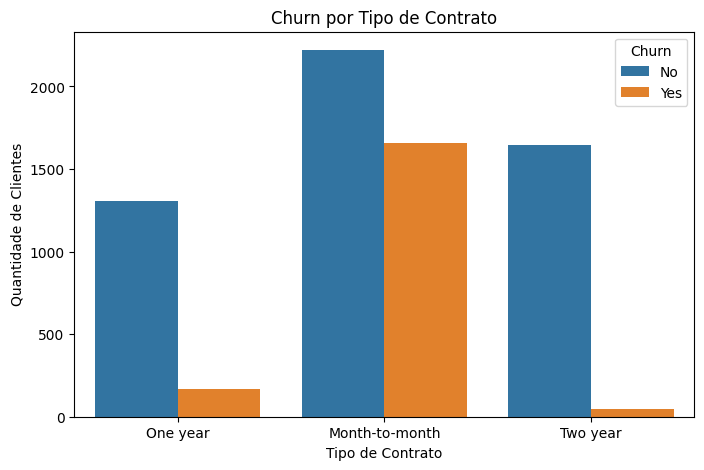

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn', data=df_expanded)
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Churn')
plt.show()


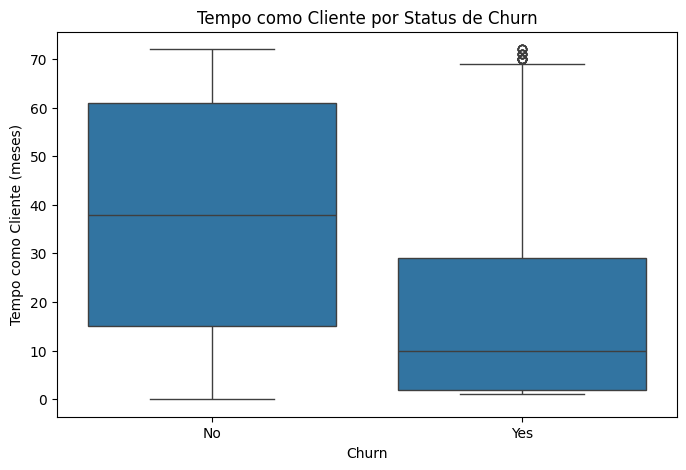

In [34]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='tenure', data=df_expanded)
plt.title('Tempo como Cliente por Status de Churn')
plt.xlabel('Churn')
plt.ylabel('Tempo como Cliente (meses)')
plt.show()


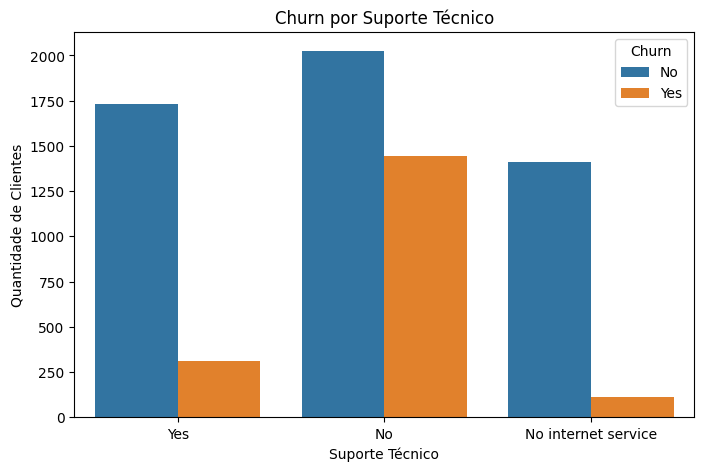

In [35]:
plt.figure(figsize=(8,5))
sns.countplot(x='TechSupport', hue='Churn', data=df_expanded)
plt.title('Churn por Suporte Técnico')
plt.xlabel('Suporte Técnico')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Churn')
plt.show()


Relatório de Análise de Evasão de Clientes (Churn) — Telecom X
1. Objetivo
Identificar os fatores que mais influenciam o cancelamento dos clientes (churn) para orientar estratégias que reduzam a evasão e aumentem a retenção.

2. Dados
Base de dados com 7.043 clientes, contendo informações demográficas, serviços contratados, tempo de vínculo, tipo de contrato, métodos de pagamento e valores cobrados.

Variável alvo: Churn (sim/não).

3. Limpeza e Preparação
Colunas com informações aninhadas foram desmembradas em colunas simples para facilitar a análise.

Valores inconsistentes na coluna Churn (224 registros vazios) foram removidos.

Nenhum valor faltante identificado após limpeza.

Tipos de dados ajustados para numéricos e categóricos.

4. Análise Exploratória (Insights principais)
Distribuição de Churn
26.5% dos clientes cancelaram o serviço.

A maioria dos clientes (73.5%) continua ativa.

Fatores associados ao Churn
Tipo de contrato:
Clientes com contrato "Month-to-month" (mensal) apresentam taxa de churn significativamente maior comparado a contratos "One year" ou "Two year".

Tempo como cliente (tenure):
Clientes que cancelaram geralmente têm menos tempo de vínculo, indicando que a retenção nos primeiros meses é crucial.

Suporte Técnico:
Clientes que não possuem suporte técnico têm maior propensão ao churn.

5. Recomendações
Incentivar contratos de maior prazo com benefícios e descontos para reduzir a rotatividade mensal.

Focar em estratégias de engajamento e suporte para clientes nos primeiros meses.

Melhorar o serviço de suporte técnico, pois ele está ligado à retenção.

